
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Paige McKenzie (pam2932), Yannick Heard (yoh64)</p>
## <p style="text-align: center;">Total points: 35</p>
## <p style="text-align: center;">Due: Monday, November 27th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ensembles (1+12+2 = 15pts)
In this question, we will compare performance of different ensemble methods: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [XGBoost](http://xgboost.readthedocs.io/en/latest/).  Note that you have to install xgboost package in addition to scikit-learn.  You can see installation guides [here](http://xgboost.readthedocs.io/en/latest/build.html).




Two  datasets are provided for this problem. For **each of the datasets ((X1.csv, y1.csv), (X2.csv, y2.csv))**, do the following:

1. Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42.

2. Build a classifier using [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [XGBoost](http://xgboost.readthedocs.io/en/latest/), respectively, and answer the following for each classifier.

 - Mention any design choices (with reasoning/justification) that you made, e.g. the hyperparameters considered for each classifier.
 - Report the mean error rate (fraction of incorrect labels) and the confusion matrix on test data. <br>
 - Report the feature importance and time of execution (training and predicting times).

3. Compare the three classifiers for the two different datasets ((X1.csv, y1.csv), (X2.csv, y2.csv)) in terms of the misclassification rate.  What are the characteristics of the dataset and the classifiers that resulted in somewhat different comparative results?

In [23]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

import os
os.chdir('C:\\Users\\yanni\\OneDrive\\Documents\\GitHub\\AdvancedPredictiveModelling\\HW 5\\hmk5_data\\')
os.getcwd()

## Loading and Splitting Data

In [74]:
X1 = pd.read_csv('X1.csv')
y1 = pd.read_csv('y1.csv')
X2 = pd.read_csv('X2.csv')
y2 = pd.read_csv('y2.csv')
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

## Data Set 1

In [93]:
rfc1 = RandomForestClassifier(15)
rfc1.fit(X1_train, y1_train)
pred1 = rfc1.predict(X1_test)
rfc1acc = metrics.accuracy_score(y1_test,pred1)
rfc1cf = confusion_matrix(y1_test, pred1)

C:\Users\yanni\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [117]:
gbc1 = GradientBoostingClassifier(learning_rate = 0.15, n_estimators = 250, max_depth = 5)
gbc1.fit(X1_train, y1_train)
pred_gbc1 = gbc1.predict(X1_test)
gbc1acc = metrics.accuracy_score(y1_test,pred_gbc1)
gbc1cf = confusion_matrix(y1_test, pred_gbc1)

In [127]:
xgbc1 = XGBClassifier(max_depth = 8)
xgbc1.fit(X1_train, y1_train)
pred_xgbc1 = xgbc1.predict(X1_test)
xgbc1acc = metrics.accuracy_score(y1_test,pred_xgbc1)
xgbc1cf = confusion_matrix(y1_test, pred_xgbc1)

In [132]:
print "The mean error rate for random forest classifier is =", 1-rfc1acc, "and the confusion matrix is,"
print rfc1cf
print "The mean error rate for gradient boosting decision tree is =", 1-gbc1acc, "and the confusion matrix is,"
print gbc1cf
print "The mean error rate for XGBoost Classifier is =", 1-xgbc1acc, "and the confusion matrix is,"
print xgbc1cf

The mean error rate for random forest classifier is = 0.13696969697 and the confusion matrix is,
[[1420  280]
 [ 172 1428]]
The mean error rate for gradient boosting decision tree is = 0.0881818181818 and the confusion matrix is,
[[1531  169]
 [ 122 1478]]
The mean error rate for XGBoost Classifier is = 0.0818181818182 and the confusion matrix is,
[[1538  162]
 [ 108 1492]]


The best mean error that was able to be obtained was with the XGBoost Classifier, but only by a small margin over the gradient boosting tree and by more over the random forest classifier. The parameters selected within each of the models used on this dataset were based on multiple attempts and seeing which alterations improved the test accuracy.

## DataSet 2

In [97]:
rfc2 = RandomForestClassifier(15)
rfc2.fit(X2_train, y2_train)
pred2 = rfc2.predict(X2_test)
rfc2acc = metrics.accuracy_score(y2_test,pred2)
rfc2cf = confusion_matrix(y2_test, pred2)

C:\Users\yanni\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [111]:
gbc2 = GradientBoostingClassifier(learning_rate = 0.15, n_estimators = 150, max_depth = 5)
gbc2.fit(X2_train, y2_train)
pred_gbc2 = gbc2.predict(X2_test)
gbc2acc = metrics.accuracy_score(y2_test,pred_gbc2)
gbc2cf = confusion_matrix(y2_test, pred_gbc2)

In [125]:
xgbc2 = XGBClassifier(max_depth = 8)
xgbc2.fit(X2_train, y2_train)
pred_xgbc2 = xgbc2.predict(X2_test)
xgbc2acc = metrics.accuracy_score(y2_test,pred_xgbc2)
xgbc2cf = confusion_matrix(y2_test, pred_xgbc2)
xgbc2acc

0.92666666666666664

In [131]:
print "The mean error rate for random forest classifier is =", 1-rfc2acc, "and the confusion matrix is,"
print rfc2cf
print "The mean error rate for gradient boosting decision tree is =", 1-gbc2acc, "and the confusion matrix is,"
print gbc2cf
print "The mean error rate for XGBoost Classifier is =", 1-xgbc2acc, "and the confusion matrix is,"
print xgbc2cf

The mean error rate for random forest classifier is = 0.0939393939394 and the confusion matrix is,
[[762  92]
 [ 63 733]]
The mean error rate for gradient boosting decision tree is = 0.0715151515152 and the confusion matrix is,
[[775  79]
 [ 39 757]]
The mean error rate for XGBoost Classifier is = 0.0733333333333 and the confusion matrix is,
[[770  84]
 [ 37 759]]


The parameters selected within each of the models used on this dataset were based on multiple attempts and seeing which alterations improved the test accuracy.
The best mean error that was able to be obtained was with the XGBoost Classifier, but only by a small margin over the gradient boosting tree and by more over the random forest classifier. For all of the models used they were all able to obtain better mean error rates on the second dataset than on the first dataset. This difference in accuracy for dataset can be occuring since the second dataset has less variables than the first data set(20 vs30), and the additional variables must add more noise and confusion to the model.
The differences in the models from a random forest to the other two is that a random forest involves building full trees and averaging that, while the others involve only building small trees and the combinations of those. The difference between the gradient boosting decision tree and the XGBoost is that XGBoost has a regularized model formation to prevent overfitting on training data allowing for better out of sample results. Other than that the two models are very similar as they use ensembles of weak decision trees. 

# Question 2: Visualization using Bokeh (10 pts)

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the "nbasalariesfull.csv" data set from HMK4, your goal is to build a Bokeh visualization which allows the user to explore how salary (on a log scale) varies with points per game (PSG) and age. You will create a visualization that allows the user to toggle the X axis of a scatter plot between PSG and age, with the y-axis always being log Salary. Also add the hover tool so that if the user hovers over a datapoint in the plot a window pops up that shows the player name, team, position, salary, and the current x variable (PSG or age) depending on the current tab.  Color each point according to a player's position and provide a legend for the colors. Add the ability to Zoom in/out.  Add slight horizontal jitter to a player's age.

Hints: 
1. see: http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#basic-tooltips for hover and zoom tool examples.
2. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
3. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
4. See: https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html  for how to use jitter transform
5. See: http://bokeh.pydata.org/en/latest/docs/gallery/iris.html for coloring points by category
6. Use output_notebook() from Bokeh to output the plot to your notebook

Include an image screenshot in addition to the visualization output.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxZoomTool, ResetTool
from bokeh.transform import jitter
from bokeh.transform import factor_cmap
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import inferno
from bokeh.models import Select
from bokeh.models.widgets import Toggle, Tabs
from bokeh.layouts import row

data = pd.read_csv("nbasalariesfull.csv")
data["logsalary"] = data.SALARY.apply(np.log)
output_notebook()

Loading BokehJS ...

In [2]:
PSG=data["PSG"] 
Age=data['Age'] 
y=data["logsalary"]                
team=data['Tm']
salary=data['SALARY']
positions=data['Pos']
players=data['Player']

source = ColumnDataSource(data=dict(PSG=PSG, Age=Age, y=y, 
                                    team=team, salary=salary, positions=positions, 
                                    players=players))

In [3]:
def create_figure(x_values):
    hover = HoverTool(tooltips=[
    ("Name", "@players"),
    ("Team", "@team"),
    ("Position", "@positions"),
    ("Salary", "@salary"),
    (x_values, "@{0}".format(x_values))
    ])
    
    p = figure(plot_height=450, plot_width=600, tools=[hover, BoxZoomTool(), ResetTool()],
         title='Basketball is a thing')
    
    p.scatter(x=jitter(x_values, width=0.2, range=p.x_range) if x_values=='Age' else x_values, y='y', source=source, 
              size=10, legend="positions", alpha=.9,
          color=factor_cmap('positions', palette=inferno(7), 
                                 factors=positions))
    
    p.xaxis.axis_label = x_values
    p.yaxis.axis_label = 'Log Salary'
    p.legend.orientation = "vertical"
    p.legend.location = "bottom_right"

    return p


tabs = Tabs(tabs=[ Panel(child=create_figure('PSG'), title="PSG"), Panel(child=create_figure('Age'), title='Age') ])

show(tabs)

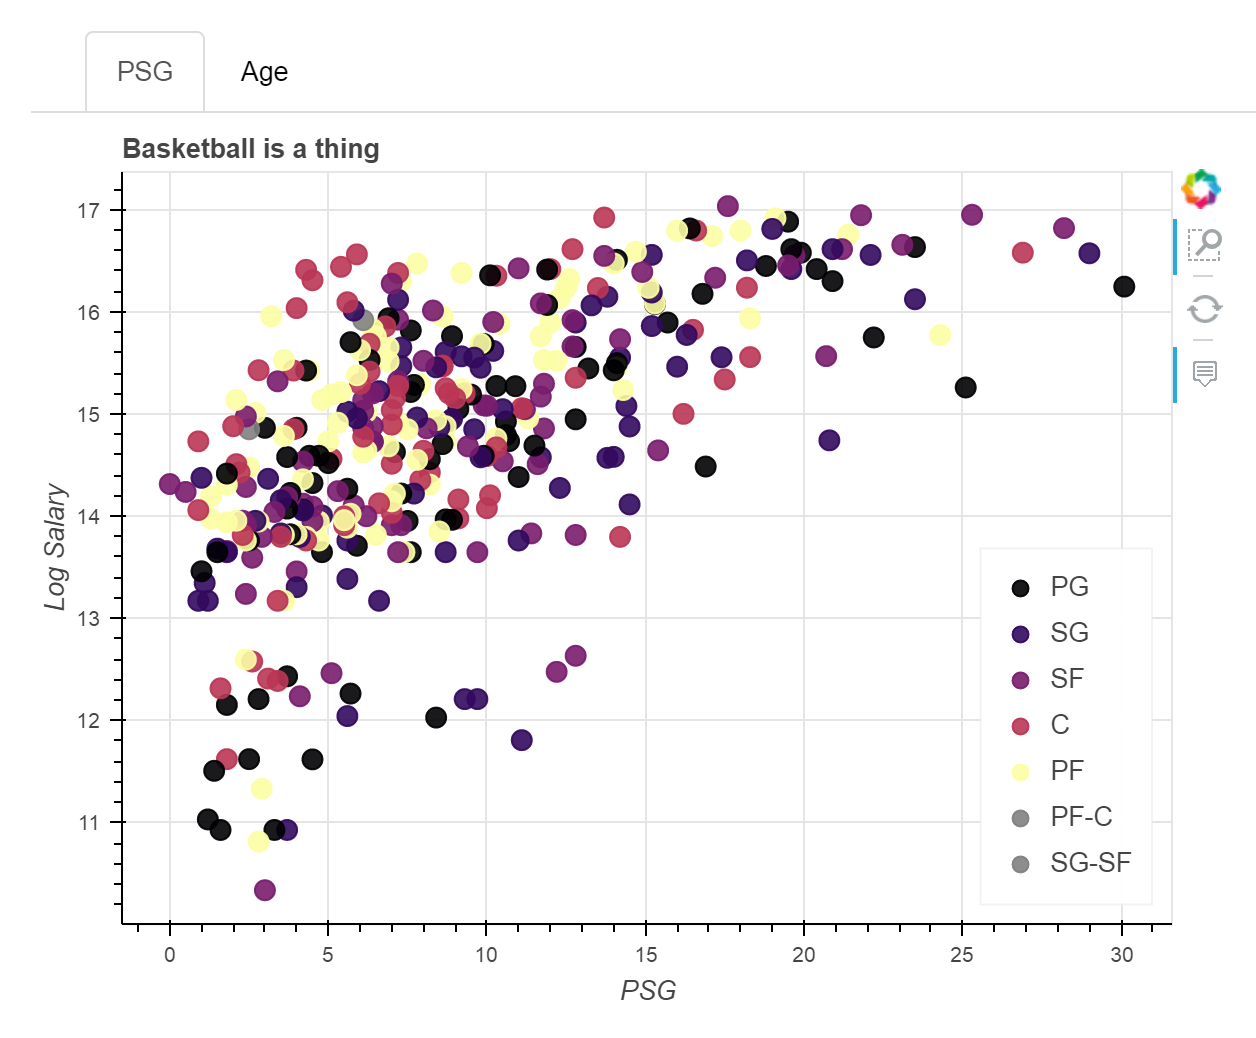

In [4]:
from IPython.display import Image
Image("vis.png")

## Solution

# Question 3: Diabetes classification using support vector machines (4+3+3=10 pts) 
(a) Apply a linear SVM, using the scikit-SVM, for the Pima Indian Women diabetes detection problem on the dataset provided (details on dataset here  http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) . Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

(b) Repeat (a) but using a Gaussian radial basis kernel.

(c) Summarize the comparative performance (mean error rates) of the classifiers. What do you conclude? (be brief).

In [6]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import accuracy_score

data_train = pd.read_csv('hmk5_data/diabetes_train-log.csv')
data_test = pd.read_csv('hmk5_data/diabetes_test-log.csv')
cols = ['numpreg', 'plasmacon', 'bloodpress', 'skinfold', 'seruminsulin', 'BMI', 'pedigreefunction', 'age']

xtrain = np.asmatrix(data_train[cols])
ytrain = np.asarray(data_train['classvariable']).T

xtest = np.asmatrix(data_test[cols])
ytest = np.asarray(data_test['classvariable']).T

## SOLUTION

I selected a list of floats to test for the slack penalty, [0.01, 0.1, 1., 5., 10., 25., 50., 100.].

In [14]:
def my_func(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

my_scorer = make_scorer(my_func, greater_is_better=True)

In [26]:
model = SVC(kernel='linear')
best_model = GridSearchCV(model, scoring=my_scorer, cv=10, param_grid={"C": [0.01, 0.1, 1., 5., 10., 25., 50., 100.]})

result = best_model.fit(xtrain, ytrain)
pred = best_model.predict(xtest)
print 'Most accurate in-sample achieved with C={}, and produces an out-of-sample accuracy of {}'.format(result.best_params_['C'], my_func(ytest, pred))

Most accurate in-sample achieved with C=1.0, and produces an out-of-sample accuracy of 0.798319327731


In [27]:
model = SVC(kernel='rbf')
best_model = GridSearchCV(model, scoring=my_scorer, cv=10, param_grid={"C": [0.01, 0.1, 1., 5., 10., 25., 50., 100.]})

result = best_model.fit(xtrain, ytrain)
pred = best_model.predict(xtest)
print 'Most accurate in-sample achieved with C={}, and produces an out-of-sample accuracy of {}'.format(result.best_params_['C'], my_func(ytest, pred))

Most accurate in-sample achieved with C=10.0, and produces an out-of-sample accuracy of 0.773109243697


Since the SVC with a linear kernel produces better out-of-sample accuracy than the Gaussian radial kernel does, indicating that the data is more separable by class with linear boundaries, rather than the more curved boundaries produced by the Gaussian radial kernel. 